In [7]:
from tensorflow import keras 
from keras import layers
from keras.utils import to_categorical
from keras.models import load_model 
import matplotlib.pyplot as plt
import argparse

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (28, 28, 1)
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=input_shape))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'))

model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │       161,364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,906 (831.66 KB)

 Trainable params: 212,906 (831.66 KB)

 Non-trainable params: 0 (0.00 B)

# Train a model

In [10]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=128,
)

model.save('./lenet.keras')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7249 - loss: 1.1633
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9130 - loss: 0.3311
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9339 - loss: 0.2388
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9494 - loss: 0.1842
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9571 - loss: 0.1546
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9614 - loss: 0.1375
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9656 - loss: 0.1251
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9698 - loss: 0.1089
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9708 - loss: 0.1049
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9724 - loss: 0.0961


# Evaluate the model

In [11]:
print("Loading Model...")
model = load_model('lenet.keras')

loss, acc = model.evaluate(
    x=x_test,
    y=y_test
)

print(f"Model loss: {loss}")
print(f"Model acc: {acc}")

Loading Model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.0979
Model loss: 0.0837232694029808
Model acc: 0.9747999906539917


# Predict an image using the model

Loading Model...
Predicting image: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Model prediction: 2


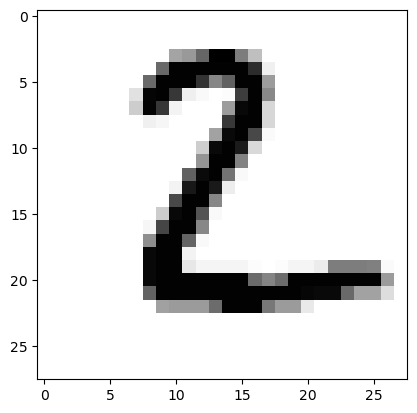

In [12]:
print("Loading Model...")
lenet = load_model('lenet.keras')

# Select an image
image_index = 1
print(f"Predicting image: {image_index}")

# Display the number 
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = lenet.predict(x_test[image_index].reshape(1, 28, 28, 1))

print(f"Model prediction: {pred.argmax()}")
plt.show()